In [1]:
# Importing Libraries for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Importing the dataset

marketing = pd.read_excel('/Users/gina/Desktop/ALY6020/marketing_campaign.xlsx')
marketing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# Shape of the dataset

marketing.shape

(2240, 29)

In [4]:
# Type of data types in variables

marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Checking null values

marketing.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# Checking for bad values

for col in marketing:
    print(col,":",marketing[col].dtypes)
    print(marketing[col].unique())

ID : int64
[5524 2174 4141 ... 7270 8235 9405]
Year_Birth : int64
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Education : object
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status : object
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income : float64
[58138. 46344. 71613. ... 56981. 69245. 52869.]
Kidhome : int64
[0 1 2]
Teenhome : int64
[0 1 2]
Dt_Customer : object
['2012-09-04' '2014-03-08' '2013-08-21' '2014-02-10' '2014-01-19'
 '2013-09-09' '2012-11-13' '2013-05-08' '2013-06-06' '2014-03-13'
 '2013-11-15' '2012-10-10' '2012-11-24' '2012-12-24' '2012-08-31'
 '2013-03-28' '2012-11-03' '2012-08-08' '2013-01-06' '2012-12-23'
 '2014-01-11' '2013-03-18' '2013-01-02' '2013-05-27' '2013-02-20'
 

In [7]:
# Statistical description of the dataset

marketing.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Cleaning

In [8]:
# Removing irrelevant variables

marketing1= marketing.drop(['ID','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','Z_CostContact','Z_Revenue'], axis = 1)

In [9]:
# Converting null values to mean based on the percentage of data missing

marketing1.isnull().sum()/len(marketing1)*100


Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp1           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [10]:
# Replacing the rows with null values with median in income column since 1% of rows have missing values

marketing1['Income'] = marketing1['Income'].fillna(marketing1['Income'].median())
marketing1.isna().sum()


Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp1           0
Complain               0
Response               0
dtype: int64

In [11]:
# Shape after removing a few columns and rows with null values

marketing1.shape

(2240, 22)

In [12]:
# Converting object'DT_customer' variable to integers to use for EDA to see the declining trend

marketing1['Dt_Customer'] = marketing1['Dt_Customer'].astype('datetime64')
marketing1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,88,88,3,8,10,4,7,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,6,2,1,1,2,5,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,21,42,1,8,2,10,4,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,3,5,2,2,0,4,6,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,27,15,5,5,3,6,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,118,247,2,9,3,4,5,0,0,0
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,0,8,7,8,2,5,7,1,0,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,12,24,1,2,3,13,6,0,0,0
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,30,61,2,6,5,10,3,0,0,0


## EDA

In [13]:
marketing1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


array([[<AxesSubplot:title={'center':'Income'}>]], dtype=object)

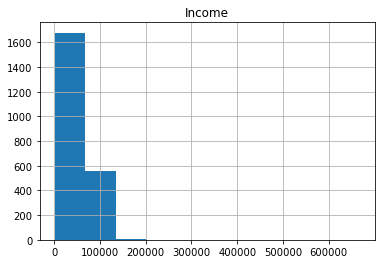

In [14]:
marketing1.hist(column='Income')

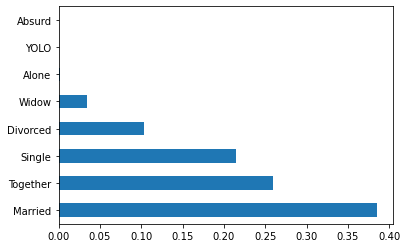

In [15]:
marketing1.Marital_Status.value_counts(normalize=True)
marketing1.Marital_Status.value_counts(normalize=True).plot.barh()
plt.show()


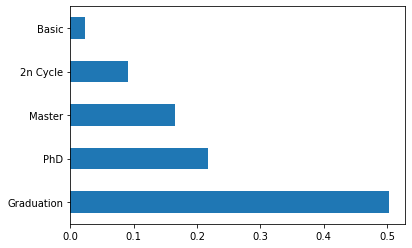

In [16]:
marketing1.Education.value_counts(normalize=True)
marketing1.Education.value_counts(normalize=True).plot.barh()
plt.show()


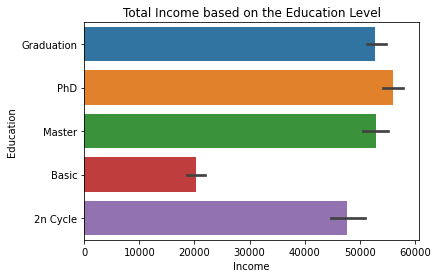

In [17]:
sns.barplot(x = marketing1['Income'],y = marketing1['Education']);
plt.title('Total Income based on the Education Level');


In [18]:
marketing1['TotalMntSpent'] = marketing1['MntWines'] + \
    marketing1['MntFruits'] + \
    marketing1['MntMeatProducts']+ \
    marketing1['MntFishProducts'] + \
    marketing1['MntSweetProducts'] + \
    marketing1['MntGoldProds']

cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

for col in cols:
    marketing1[col+'_pct'] = round((marketing1[col]/marketing1['TotalMntSpent'])*100,2)
    

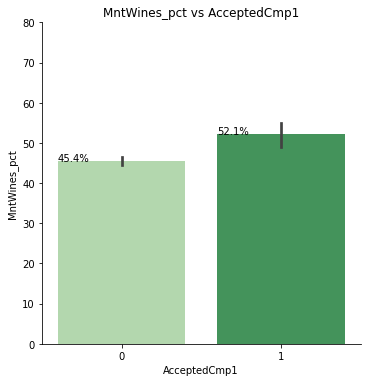

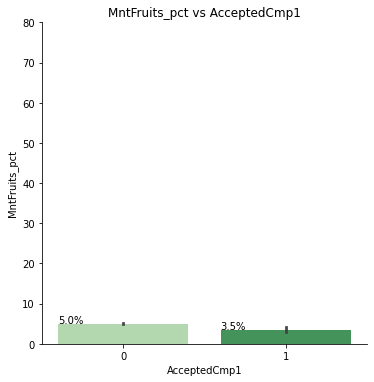

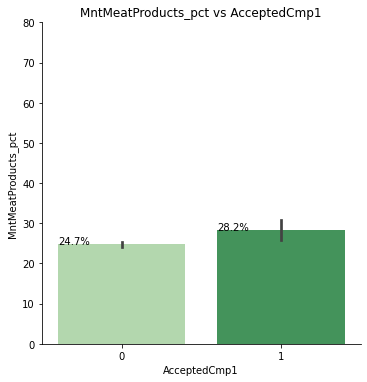

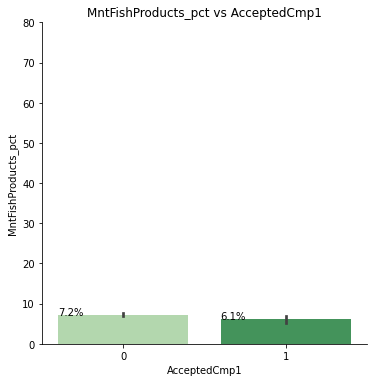

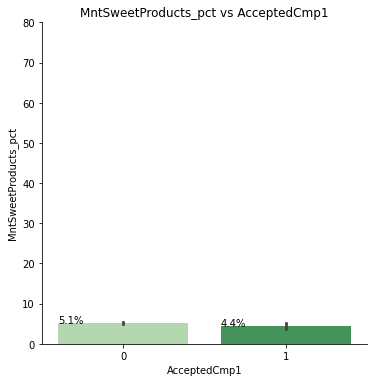

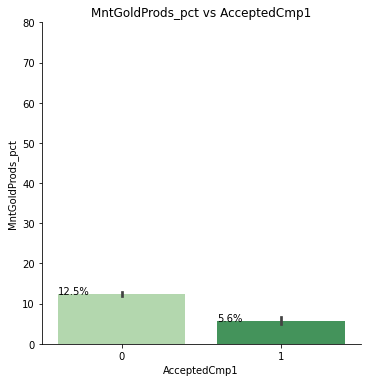

In [19]:
import plotly.graph_objects as go

cols = ['MntWines_pct', 'MntFruits_pct', 'MntMeatProducts_pct','MntFishProducts_pct', 'MntSweetProducts_pct',
        'MntGoldProds_pct']

for col in cols: 
    g = sns.catplot(x= 'AcceptedCmp1', y=col, kind='bar', data = marketing1, palette=("Greens"))
    plt.title(col+ ' vs AcceptedCmp1')
    plt.xlabel('AcceptedCmp1')
    plt.ylabel(col)    
    g.ax.set_ylim(0,80)
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)


In [20]:
#Combining different dataframe into a single column 

marketing1['Children'] = marketing1['Kidhome'] + marketing1['Teenhome']

marketing1['NumTotalPurchases'] = marketing1['NumWebPurchases'] + marketing1['NumCatalogPurchases'] + marketing1['NumStorePurchases'] + marketing1['NumDealsPurchases']


In [21]:
# Deriving "Age" from column 'year_birth' 

marketing1['Age'] = 2022 - marketing1["Year_Birth"]

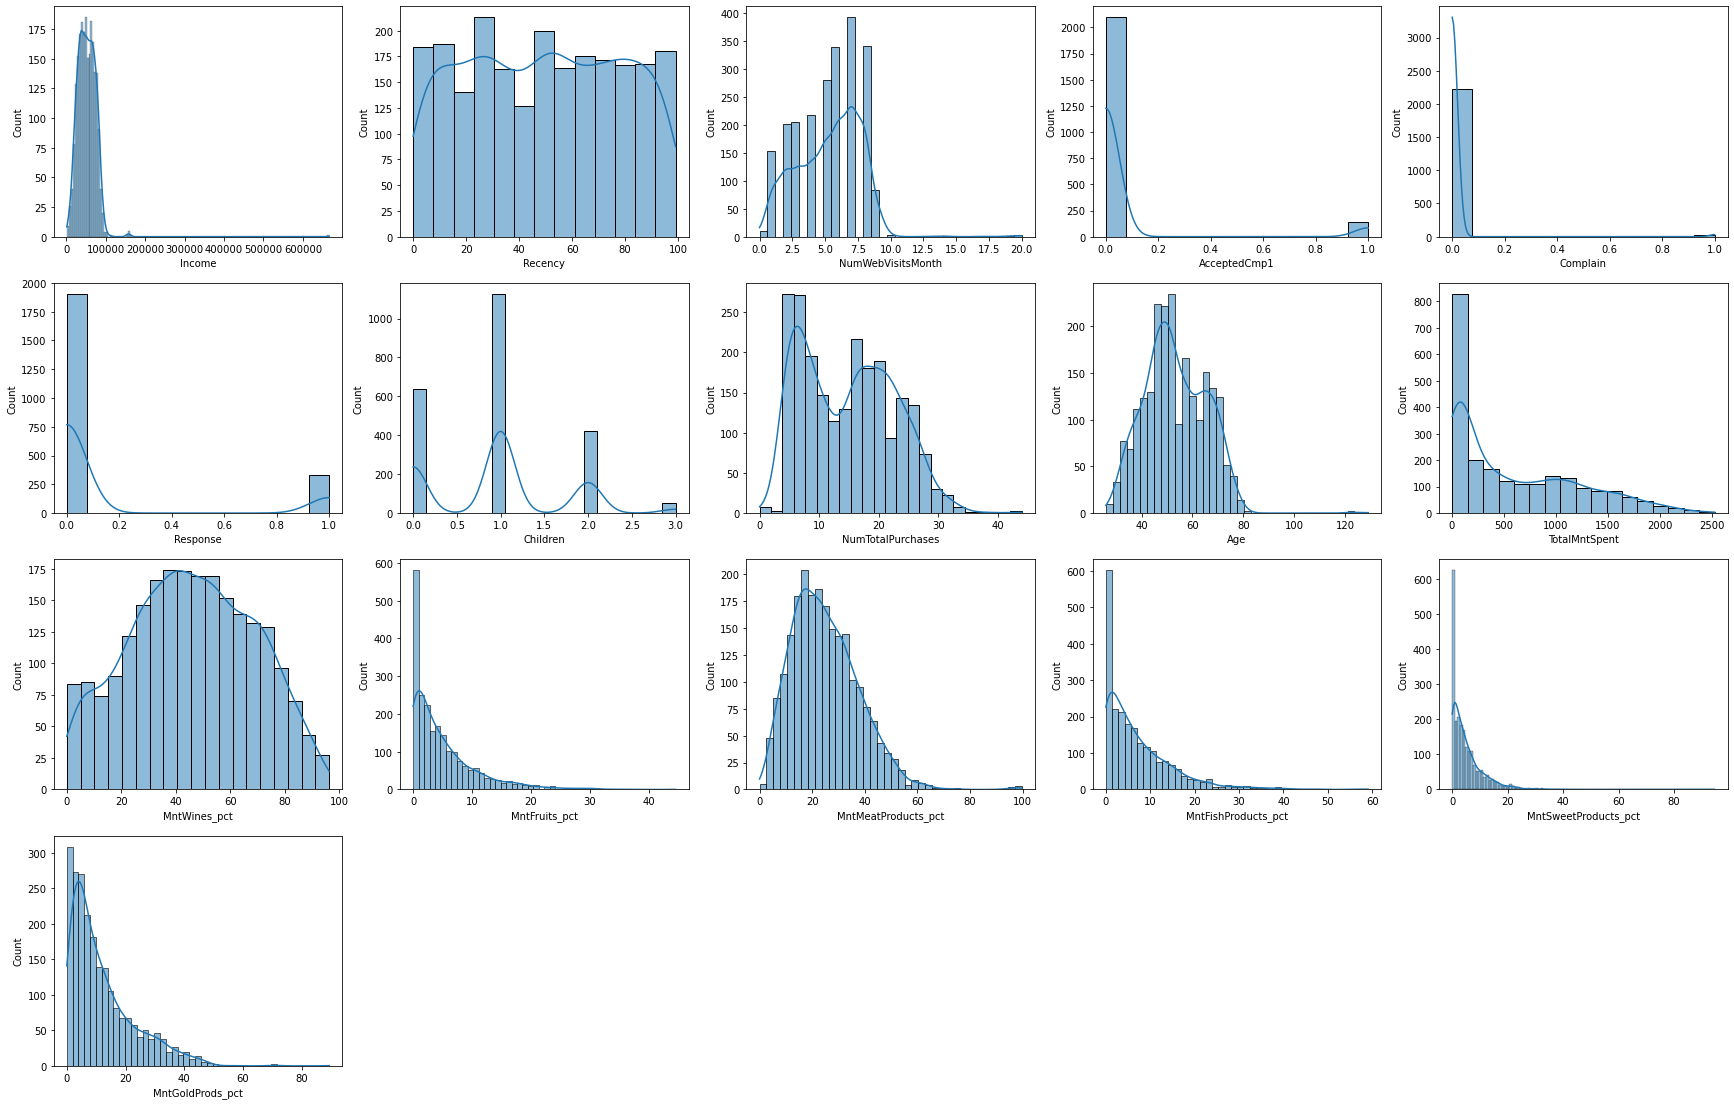

In [22]:
# Plotting all the numerical variables to see the distribution

numerical_var = ['Income','Recency','NumWebVisitsMonth','AcceptedCmp1',
                'Complain','Response','Children','NumTotalPurchases','Age','TotalMntSpent','MntWines_pct',
                'MntFruits_pct','MntMeatProducts_pct','MntFishProducts_pct','MntSweetProducts_pct','MntGoldProds_pct']

fig = 0

plt.figure(figsize=(30,50))
    
for col in numerical_var: 
    fig = fig+1
    plt.subplot(10,5,fig)
    ax = sns.histplot(x = marketing1[col], palette=("pink"),kde=True)
    plt.xlabel(col)

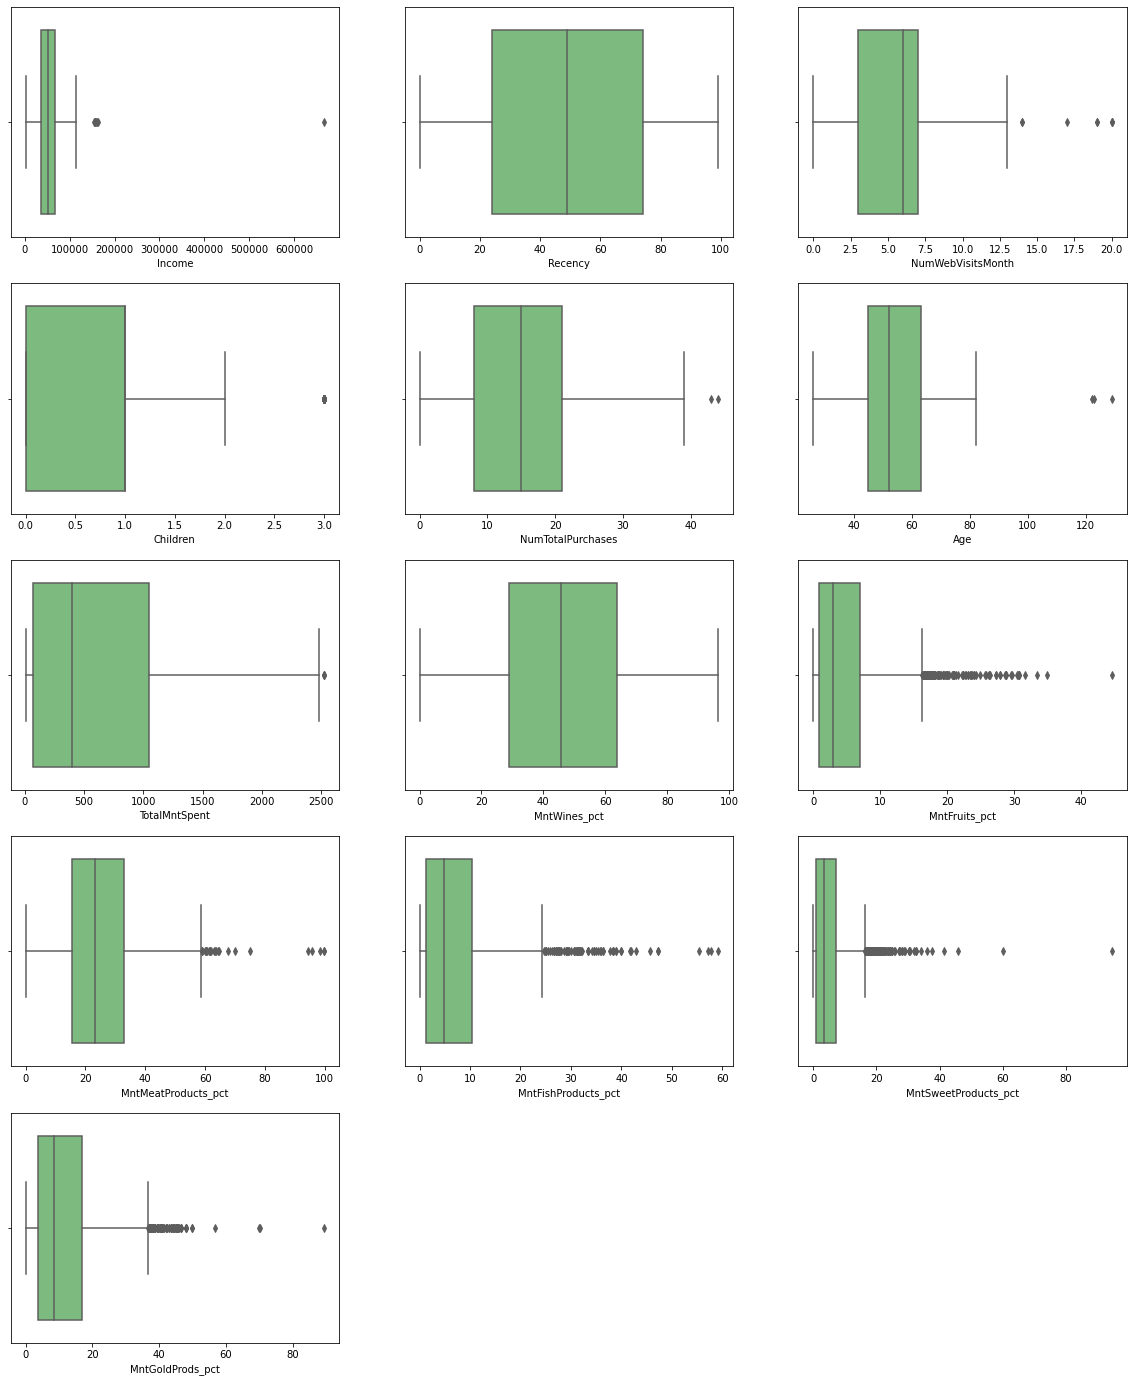

In [23]:
# Finding outliers in all the numerical columns 

numerical_var = ['Income','Recency','NumWebVisitsMonth','Children','NumTotalPurchases','Age','TotalMntSpent',
                 'MntWines_pct','MntFruits_pct','MntMeatProducts_pct','MntFishProducts_pct','MntSweetProducts_pct',
                 'MntGoldProds_pct']


fig = 0

plt.figure(figsize=(20,50))
    
for col in numerical_var: 
    fig = fig+1
    plt.subplot(10,3,fig)
    ax = sns.boxplot(x = marketing1[col], palette=("Greens"))
    plt.xlabel(col)

In [24]:
marketing1['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [25]:
# Accepted campaign based on Education

accep_camp = marketing1.groupby(['AcceptedCmp1', 'Education']).size()
accep_camp

AcceptedCmp1  Education 
0             2n Cycle       189
              Basic           54
              Graduation    1045
              Master         352
              PhD            456
1             2n Cycle        14
              Graduation      82
              Master          18
              PhD             30
dtype: int64

In [26]:
# Accepted campaign based on Marital_Status

accep_camp1 = marketing1.groupby(['AcceptedCmp1', 'Marital_Status']).size()
accep_camp1

AcceptedCmp1  Marital_Status
0             Absurd              1
              Alone               3
              Divorced          220
              Married           801
              Single            449
              Together          548
              Widow              72
              YOLO                2
1             Absurd              1
              Divorced           12
              Married            63
              Single             31
              Together           32
              Widow               5
dtype: int64

In [27]:
#Percentage of people who accepted the campaign

np.sum(marketing1['AcceptedCmp1']== 1)/len(marketing1['AcceptedCmp1'])*100

6.428571428571428

In [28]:
#Percentage of people who did not accept the campaign

np.sum(marketing1['AcceptedCmp1']== 0)/len(marketing1['AcceptedCmp1'])*100

93.57142857142857

In [29]:
#Deleting some column to reduce dimension

col_del = ['Year_Birth', "Dt_Customer", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" ,
           "Kidhome", "Teenhome",'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
          'MntGoldProds']
marketing1 = marketing1.drop(columns=col_del,axis=1)
marketing1.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp1,Complain,Response,TotalMntSpent,MntWines_pct,MntFruits_pct,MntMeatProducts_pct,MntFishProducts_pct,MntSweetProducts_pct,MntGoldProds_pct,Children,NumTotalPurchases,Age
0,Graduation,Single,58138.0,58,7,0,0,1,1617,39.27,5.44,33.77,10.64,5.44,5.44,0,25,65
1,Graduation,Single,46344.0,38,5,0,0,0,27,40.74,3.70,22.22,7.41,3.70,22.22,2,6,68
2,Graduation,Together,71613.0,26,4,0,0,0,776,54.90,6.31,16.37,14.30,2.71,5.41,0,21,57
3,Graduation,Together,26646.0,26,6,0,0,0,53,20.75,7.55,37.74,18.87,5.66,9.43,1,8,38
4,PhD,Married,58293.0,94,5,0,0,0,422,41.00,10.19,27.96,10.90,6.40,3.55,1,19,41


<AxesSubplot:>

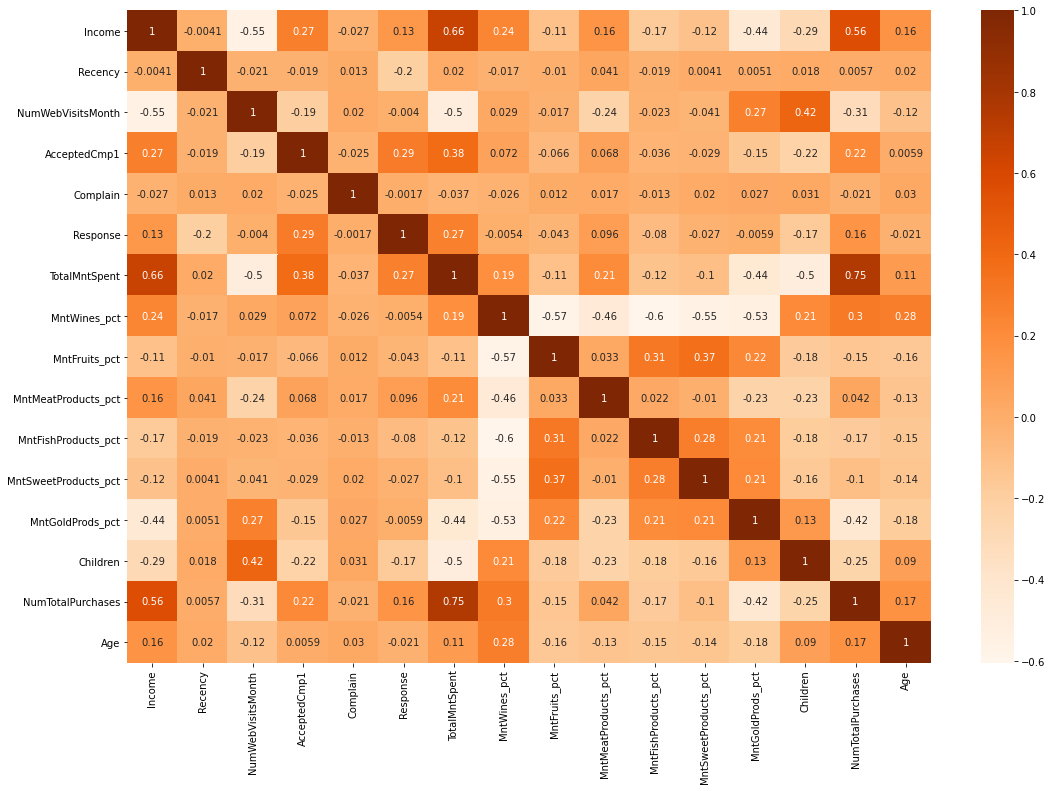

In [30]:
# Plotting correlation plot

import seaborn as sns
plt.figure(figsize = (18, 12))
corr = marketing1.corr()
sns.heatmap(corr, cmap="Oranges", annot=True)

# Analysis (Logistic Regression & SVM)

In [31]:
# Converting object variables into dummy variables

def to_one_hot(df, col):
    one_hot = pd.get_dummies(df[col])
    one_hot.columns = col+"_"+one_hot.columns
    df.drop(col, axis=1, inplace=True)
    df = df.join(one_hot)  
    return df


In [32]:
marketing1 = to_one_hot(marketing1, "Marital_Status")
marketing1 = to_one_hot(marketing1, "Education")
marketing1.head()


,Income,Recency,NumWebVisitsMonth,AcceptedCmp1,Complain,Response,TotalMntSpent,MntWines_pct,MntFruits_pct,MntMeatProducts_pct,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,58138.0,58,7,0,0,1,1617,39.27,5.44,33.77,...,0,1,0,0,0,0,0,1,0,0
1,46344.0,38,5,0,0,0,27,40.74,3.70,22.22,...,0,1,0,0,0,0,0,1,0,0
2,71613.0,26,4,0,0,0,776,54.90,6.31,16.37,...,0,0,1,0,0,0,0,1,0,0
3,26646.0,26,6,0,0,0,53,20.75,7.55,37.74,...,0,0,1,0,0,0,0,1,0,0
4,58293.0,94,5,0,0,0,422,41.00,10.19,27.96,...,1,0,0,0,0,0,0,0,0,1


In [33]:
marketing1['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [34]:
marketing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Recency                  2240 non-null   int64  
 2   NumWebVisitsMonth        2240 non-null   int64  
 3   AcceptedCmp1             2240 non-null   int64  
 4   Complain                 2240 non-null   int64  
 5   Response                 2240 non-null   int64  
 6   TotalMntSpent            2240 non-null   int64  
 7   MntWines_pct             2240 non-null   float64
 8   MntFruits_pct            2240 non-null   float64
 9   MntMeatProducts_pct      2240 non-null   float64
 10  MntFishProducts_pct      2240 non-null   float64
 11  MntSweetProducts_pct     2240 non-null   float64
 12  MntGoldProds_pct         2240 non-null   float64
 13  Children                 2240 non-null   int64  
 14  NumTotalPurchases       

In [35]:
from sklearn.preprocessing import MaxAbsScaler


scaler = MaxAbsScaler()
scaler.fit(marketing1)
scaled = scaler.transform(marketing1)
scaled_df = pd.DataFrame(scaled, columns = marketing1.columns)

In [36]:
# Separating dependent and independent variables

import statsmodels.api as sm
X = scaled_df.drop(columns='AcceptedCmp1')
x_constant = sm.add_constant(X)
y = scaled_df.AcceptedCmp1


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_constant, y, test_size = 0.3, random_state = 1)



In [38]:
Xlog2 = sm.add_constant(X_train) 
log_model = sm.Logit(y_train,Xlog2) 
logr_fit = log_model.fit()
print(logr_fit.summary())


         Current function value: 1.607200
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 1568
Model:                          Logit   Df Residuals:                     1541
Method:                           MLE   Df Model:                           26
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                  -5.679
Time:                        16:32:57   Log-Likelihood:                -2520.1
converged:                      False   LL-Null:                       -377.33
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.327e+05        nan        nan        nan         nan         nan
Income                    

/Users/gina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [40]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[627,   3],
       [ 33,   9]])

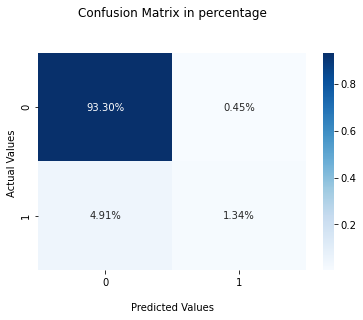

In [41]:
# providing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix in percentage\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


In [42]:
# Accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [43]:
from sklearn.metrics import precision_score, recall_score
print (classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       630
         1.0       0.75      0.21      0.33        42

    accuracy                           0.95       672
   macro avg       0.85      0.60      0.65       672
weighted avg       0.94      0.95      0.93       672



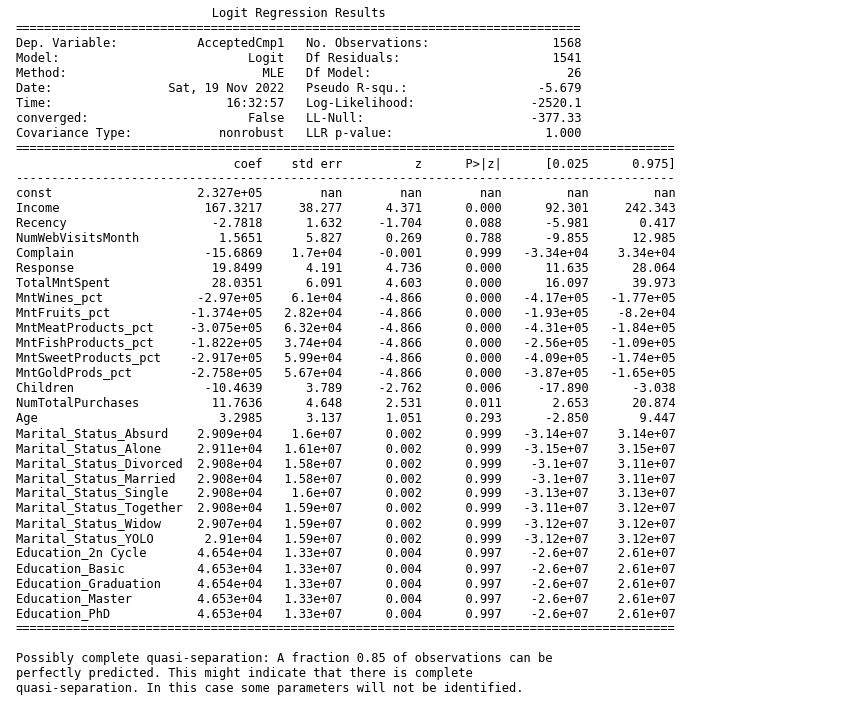

In [44]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(logr_fit.summary()), {'fontsize': 12}, fontproperties = 'monospace'), plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

# Running SVM model


In [45]:
from sklearn import svm

svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = svm_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
cnf_matrix

array([[630,   0],
       [ 42,   0]])

In [46]:
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_model.score(X_test, y_test)*100),'%')

Accuracy of SVM classifier on test set: 93.75 %
